In [1]:
# Merging all the csv files present within the Extra_suppli directory

import pandas as pd
import os

def merge_csv_files(input_dir, output_file):
    # Get a list of all CSV files in the input directory
    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]

    # Initialize an empty list to store DataFrames
    df_list = []

    # Read each CSV file into a DataFrame and append to the list
    for file in csv_files:
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path)
        df_list.append(df)

    # Concatenate all DataFrames in the list along the rows
    merged_df = pd.concat(df_list, ignore_index=True)

    # Write the merged DataFrame to a single CSV file
    merged_df.to_csv(output_file, index=False)

# Example usage:
input_directory = '/'  # Specify the directory containing CSV files
output_file = 'Dataset.csv'  # Specify the output file path
merge_csv_files(input_directory, output_file)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Dataset.csv")
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3989 non-null   object 
 1   vendor_project      3989 non-null   object 
 2   product             3984 non-null   object 
 3   vulnerability_name  3989 non-null   object 
 4   date_added          3989 non-null   object 
 5   short_description   3956 non-null   object 
 6   required_action     3986 non-null   object 
 7   due_date            3985 non-null   object 
 8   notes               82 non-null     object 
 9   grp                 3989 non-null   int64  
 10  pub_date            3110 non-null   object 
 11  cvss                2489 non-null   float64
 12  cwe                 3095 non-null   object 
 13  vector              2484 non-null   object 
 14  complexity          2489 non-null   object 
 15  severity            2489 non-null   object 
dtypes: flo

In [6]:
# Checking if there exists duplicate cve_id
df.cve_id.value_counts()

cve_id
CVE-2021-27104    5
CVE-2013-0631     5
CVE-2020-7247     5
CVE-2020-5410     5
CVE-2020-25223    5
                 ..
CVE-2020-28949    1
CVE-2020-36193    1
CVE-2021-31010    1
CVE-2021-38406    1
CVE-2022-0482     1
Name: count, Length: 865, dtype: int64

In [7]:
df[df.cve_id=='CVE-2013-0631']

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
485,CVE-2013-0631,adobe,ColdFusion,Adobe ColdFusion Information Disclosure Vulner...,2022-03-07,Adobe Coldfusion contains an unspecified vulne...,Apply updates per vendor instructions.,2022-09-07,NaN,17,2013-01-09,NaN,CWE-200,NaN,NaN,NaN
1271,CVE-2013-0631,adobe,ColdFusion,Adobe ColdFusion Information Disclosure Vulner...,2022-03-07,Adobe Coldfusion contains an unspecified vulne...,Apply updates per vendor instructions.,2022-09-07,NaN,17,2013-01-09,NaN,CWE-200,NaN,NaN,NaN
2048,CVE-2013-0631,adobe,ColdFusion,Adobe ColdFusion Information Disclosure Vulner...,2022-03-07,Adobe Coldfusion contains an unspecified vulne...,Apply updates per vendor instructions.,2022-09-07,NaN,17,2013-01-09,NaN,CWE-200,NaN,NaN,NaN
2835,CVE-2013-0631,adobe,ColdFusion,Adobe ColdFusion Information Disclosure Vulner...,2022-03-07,Adobe Coldfusion contains an unspecified vulne...,Apply updates per vendor instructions.,2022-09-07,NaN,17,2013-01-09,NaN,CWE-200,NaN,NaN,NaN
3609,CVE-2013-0631,adobe,ColdFusion,Adobe ColdFusion Information Disclosure Vulner...,2022-03-07,Adobe Coldfusion contains an unspecified vulne...,Apply updates per vendor instructions.,2022-09-07,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN


    -> The rows are exactly the same, hence there exists duplicate columns in the dataset

In [8]:
# Dropping the duplicated rows from the dataframe
df.drop_duplicates(subset=['cve_id', 'vendor_project', 'date_added'],ignore_index=True, inplace=True)

In [9]:
df.shape

(866, 16)

In [10]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [11]:
# Dropping the rows where Severity Value is missing
df.dropna(subset='severity', inplace=True, ignore_index=True)

In [12]:
df.shape

(627, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              627 non-null    object 
 1   vendor_project      627 non-null    object 
 2   product             626 non-null    object 
 3   vulnerability_name  627 non-null    object 
 4   date_added          627 non-null    object 
 5   short_description   618 non-null    object 
 6   required_action     624 non-null    object 
 7   due_date            623 non-null    object 
 8   notes               6 non-null      object 
 9   grp                 627 non-null    int64  
 10  pub_date            626 non-null    object 
 11  cvss                627 non-null    float64
 12  cwe                 626 non-null    object 
 13  vector              622 non-null    object 
 14  complexity          627 non-null    object 
 15  severity            627 non-null    object 
dtypes: float

In [14]:
df.isna().sum()

cve_id                  0
vendor_project          0
product                 1
vulnerability_name      0
date_added              0
short_description       9
required_action         3
due_date                4
notes                 621
grp                     0
pub_date                1
cvss                    0
cwe                     1
vector                  5
complexity              0
severity                0
dtype: int64

In [15]:
# Dropping the columns: 'date_added', 'due_date', 'short_description', 'required_action', 'notes', 'pub_date', 'vector', 'cwe'
df.drop(columns=['date_added', 'due_date', 'short_description', 'required_action', 'notes', 'pub_date', 'vector', 'cwe'], axis=1, inplace=True)

In [16]:
df.isna().sum()

cve_id                0
vendor_project        0
product               1
vulnerability_name    0
grp                   0
cvss                  0
complexity            0
severity              0
dtype: int64

In [17]:
# Removing the product which has missing value
df.dropna(subset='product', ignore_index=True, inplace=True)

In [18]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,grp,cvss,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,9.8,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,7.8,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,1,9.8,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,1,9.8,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,1,8.8,LOW,HIGH


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              626 non-null    object 
 1   vendor_project      626 non-null    object 
 2   product             626 non-null    object 
 3   vulnerability_name  626 non-null    object 
 4   grp                 626 non-null    int64  
 5   cvss                626 non-null    float64
 6   complexity          626 non-null    object 
 7   severity            626 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 39.3+ KB


In [20]:
# Converting the datatype of complexity and severity to category
df.complexity = df.complexity.astype('category')
df.severity = df.severity.astype('category')

In [21]:
df.severity.value_counts().reset_index()

,severity,count
0,HIGH,346
1,CRITICAL,212
2,MEDIUM,62
3,LOW,6


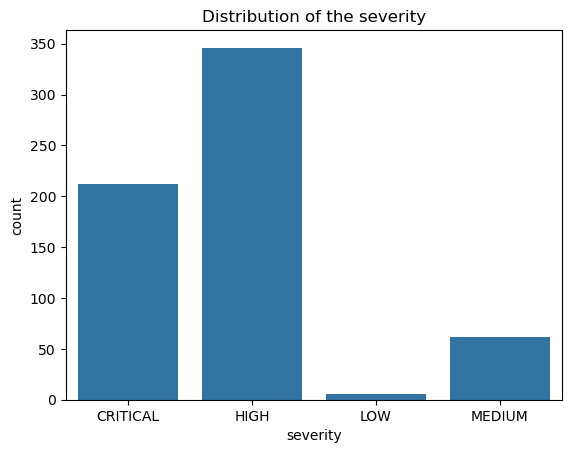

In [22]:
sns.barplot(data=df.severity.value_counts().reset_index(), x='severity', y='count');
plt.title("Distribution of the severity")
plt.show()

    -> THere is highest number of High severity cases present
    -> Critical cases are second highest
    -> Followed by Medium and Low Severity

    -> Data is Highly Imbalanced, we need to Balance it. Will do by using SMOTE oversampling technique

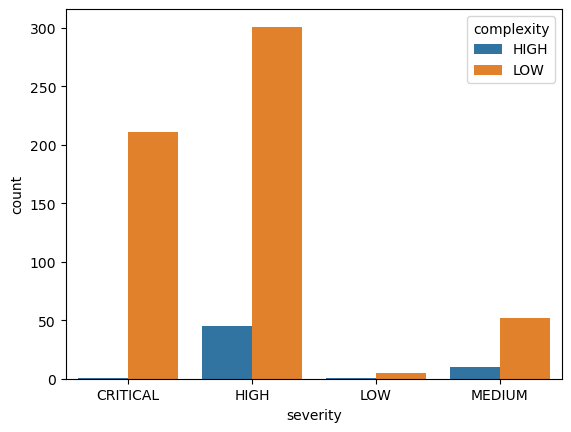

In [23]:
sns.countplot(data=df, hue = 'complexity', x='severity');

    -> There is highest number of low complexity High severity cases
    -> Followed by low complexity critical severity cases
    -> Then low complexity medium severity cases
    -> Fourth largest cases are of type High complexity, high severity
    -> High complexity medium severity cases are at 5th spot

In [24]:
# Mapping the complexity
complex_map = {'LOW':1, 'HIGH':2}
df.complexity = df.complexity.map(complex_map)

In [25]:
# Mapping Severity
severity_map = {'CRITICAL':3, 'HIGH':2, 'MEDIUM':1, 'LOW':0}
df.severity = df.severity.map(severity_map)

In [26]:
df.severity.value_counts()

severity
2    346
3    212
1     62
0      6
Name: count, dtype: int64

In [27]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,grp,cvss,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,9.8,1,3
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,7.8,1,2
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,1,9.8,1,3
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,1,9.8,1,3
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,1,8.8,1,2


In [28]:
# Convert the datatype of severity and complexity back to integer
df.complexity = df.complexity.astype('int')
df.severity = df.severity.astype('int')

In [29]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,grp,cvss,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,9.8,1,3
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,7.8,1,2
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,1,9.8,1,3
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,1,9.8,1,3
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,1,8.8,1,2


In [30]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [31]:
# Over Sampling the data to handle class imbalance
# Separate features (X) and target (y)

X = df[['grp','cvss','complexity']]
X_VN = df['vulnerability_name']
X_VP = df['vendor_project']
X_P = df['product']
y = df.severity

# Initialize a TF-IDF vectorizer
tfidf_vectorizer_VN = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer_VP = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer_P = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_VN_tfidf = tfidf_vectorizer_VN.fit_transform(X_VN)
X_VP_tfidf = tfidf_vectorizer_VP.fit_transform(X_VP)
X_P_tfidf = tfidf_vectorizer_P.fit_transform(X_P)

X_final = pd.concat( 
            (
                X, 
            pd.DataFrame(X_VN_tfidf.toarray(), columns=tfidf_vectorizer_VN.get_feature_names_out(), index=X.index), 
            pd.DataFrame(X_VP_tfidf.toarray(), columns=tfidf_vectorizer_VP.get_feature_names_out(), index=X.index),
            pd.DataFrame(X_P_tfidf.toarray(), columns=tfidf_vectorizer_P.get_feature_names_out(), index=X.index)
            ), 
            axis=1)


In [32]:
X_final

,grp,cvss,complexity,01,02,03,0day,10,100,1000,...,xenmobile,xg,xi,xml,xp,xperience,xr,xtm,zcs,zimbra
0,1,9.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,8.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,34,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,32,3.1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,31,3.1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
624,31,3.1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='all')

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X_final, y)


In [34]:
X_resampled.shape

(1384, 1404)

In [49]:
y_resampled.value_counts()

severity
3    346
2    346
1    346
0    346
Name: count, dtype: int64

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
# Random FOrest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [38]:
y_pred = rf_classifier.predict(X_test)

In [39]:
np.unique(y_pred)

array([0, 1, 2, 3])

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9530685920577617
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.95      0.96        79
           2       0.91      0.90      0.90        67
           3       0.94      0.97      0.95        64

    accuracy                           0.95       277
   macro avg       0.95      0.95      0.95       277
weighted avg       0.95      0.95      0.95       277



In [51]:
# Risk is defined as the maximum out of complexity and severity
df['Risk'] = df[['complexity','severity']].max(axis=1)

In [52]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,grp,cvss,complexity,severity,Risk
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,9.8,1,3,3
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,1,7.8,1,2,2
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,1,9.8,1,3,3
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,1,9.8,1,3,3
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,1,8.8,1,2,2
